In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [ ]:
en = OneHotEncoder

In [ ]:
data = pd.read_csv("/content/student_admission_record_dirty.csv")
data

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN
...,...,...,...,...,...,...,...
152,Ali,19.0,Female,85.0,78.09,Quetta,Accepted
153,Bilal,17.0,Female,81.0,84.40,Islamabad,Rejected
154,Fatima,21.0,Female,98.0,50.86,Multan,Accepted
155,Shoaib,-1.0,Male,91.0,80.12,Quetta,Accepted


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [ ]:
data.shape

(157, 7)

In [ ]:
data.isnull().sum()

,0
Name,10
Age,10
Gender,10
Admission Test Score,11
High School Percentage,11
City,10
Admission Status,10


<Axes: >

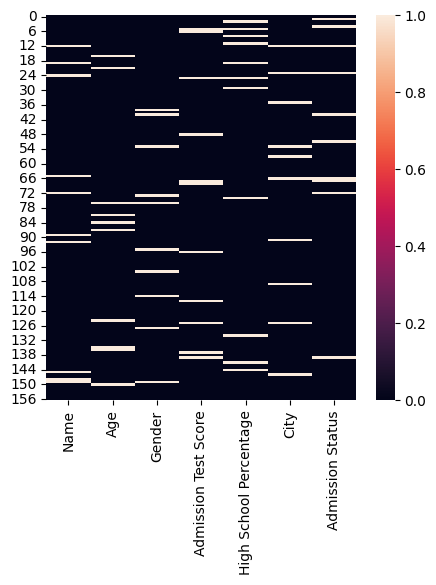

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.isnull())

In [ ]:
null_percentage = data.isnull().sum()/data.shape[0]*100
null_percentage

,0
Name,6.369427
Age,6.369427
Gender,6.369427
Admission Test Score,7.006369
High School Percentage,7.006369
City,6.369427
Admission Status,6.369427


In [ ]:
data.shape

(157, 7)

In [ ]:
data = data.fillna("Unknown")

<Axes: >

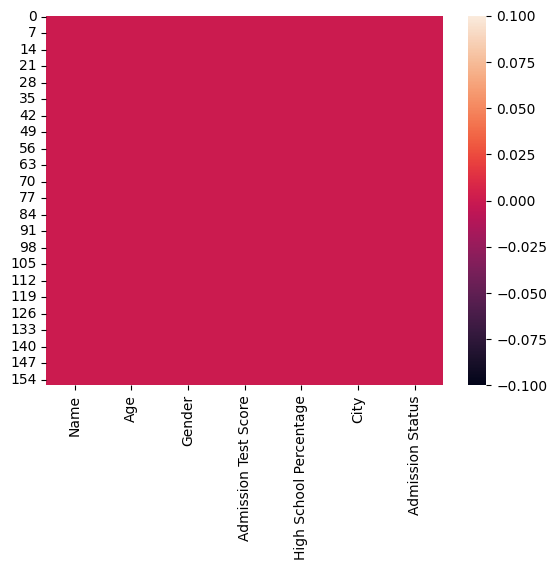

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
df = data

In [ ]:
df['Admission Test Score'] = pd.to_numeric(
    df['Admission Test Score'], errors='coerce'
)
df = df.dropna(subset=['Admission Test Score'])

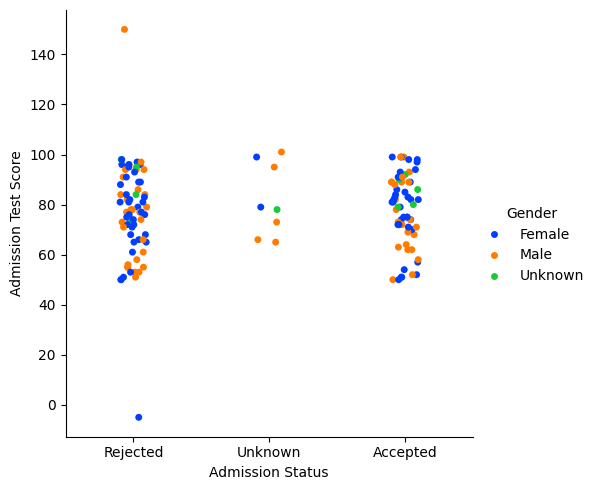

In [ ]:
sns.catplot(data=df, x='Admission Status', y='Admission Test Score', hue = 'Gender' , palette = 'bright')

pd.to_numeric(..., errors='coerce')
pd.to_numeric tries to convert each value to a number.
errors='coerce' means:
If a value cant be turned into a number (e.g., "N/A" or "abc"), it gets replaced with NaN instead of causing an error.
Result: a clean numeric Series with any invalid values turned into NaN.
3. sns.boxplot(data=df, x=...)
Instead of passing the original possibly messy column, you pass the cleaned numeric version.
Seaborn can now plot it without choking on non-numeric entries.


<Axes: xlabel='Admission Test Score'>

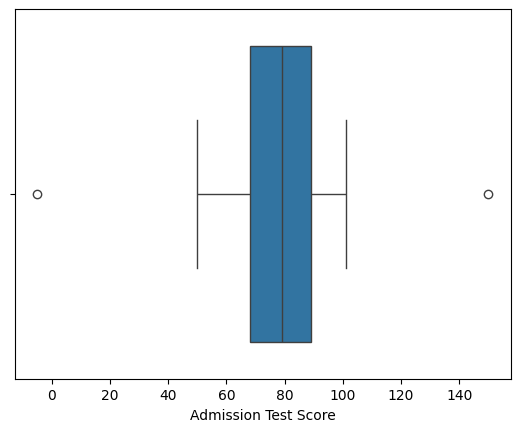

In [ ]:
sns.boxplot(data=df, x=pd.to_numeric(df['Admission Test Score'], errors='coerce'))

##subset usually means “pick specific columns or rows to focus on, instead of using the whole DataFrame.”


In [ ]:
data ['Admission Test Score'] = pd.to_numeric(data['Admission Test Score'], errors = "coerce")

data = data.dropna(subset= ["Admission Test Score"])

Q1 = np.percentile(data["Admission Test Score"], 25)
Q3 = np.percentile(data["Admission Test Score"] , 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data["Admission Test Score"] < lower_bound) | (data["Admission Test Score"] > upper_bound)]

print("outliers :\n" , outliers)



outliers :
      Name   Age  Gender  ...  High School Percentage     City Admission Status
31  Rehan  19.0  Female  ...                   61.91   Quetta         Rejected
91   Umar  22.0    Male  ...                   77.69  Unknown         Rejected

[2 rows x 7 columns]


In [ ]:
df.mode()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Unknown,17.0,Female,89.0,Unknown,Quetta,Rejected


.apply() is a way to apply a function to each element, row, or column of a DataFrame or Series.

In [ ]:

median_score = data["Admission Test Score"].median()


data['Is Outlier'] = (data['Admission Test Score'] < lower_bound) | (data['Admission Test Score'] > upper_bound)


data['Admission Test Score'] = data['Admission Test Score'].apply(
    lambda x: median_score if x < lower_bound or x > upper_bound else x
)

print(data)

        Name   Age  Gender  ...       City Admission Status Is Outlier
0    Shehroz  24.0  Female  ...     Quetta         Rejected      False
1      Waqar  21.0  Female  ...    Karachi          Unknown      False
2     Bushra  17.0    Male  ...  Islamabad         Accepted      False
3      Aliya  17.0    Male  ...    Karachi         Rejected      False
4      Bilal  20.0    Male  ...     Lahore          Unknown      False
..       ...   ...     ...  ...        ...              ...        ...
152      Ali  19.0  Female  ...     Quetta         Accepted      False
153    Bilal  17.0  Female  ...  Islamabad         Rejected      False
154   Fatima  21.0  Female  ...     Multan         Accepted      False
155   Shoaib  -1.0    Male  ...     Quetta         Accepted      False
156     Maaz  17.0    Male  ...     Lahore         Accepted      False

[146 rows x 8 columns]


A lambda function is a small anonymous function — a function without a name — that you can define in a single line.

lambda = a shortcut for writing simple, one-time-use functions without naming them.


In [ ]:
median_score = data["Admission Test Score"].median()
data['Is Outliers'] = (data['Admission Test Score'] < lower_bound) | (data['Admission Test Score'] > upper_bound)
data['Admission Test Score'] = data['Admission Test Score'].apply(lambda x: median_score if x < lower_bound or x > upper_bound else x)

print(data)

        Name   Age  Gender  ...  Admission Status Is Outlier Is Outliers
0    Shehroz  24.0  Female  ...          Rejected      False       False
1      Waqar  21.0  Female  ...           Unknown      False       False
2     Bushra  17.0    Male  ...          Accepted      False       False
3      Aliya  17.0    Male  ...          Rejected      False       False
4      Bilal  20.0    Male  ...           Unknown      False       False
..       ...   ...     ...  ...               ...        ...         ...
152      Ali  19.0  Female  ...          Accepted      False       False
153    Bilal  17.0  Female  ...          Rejected      False       False
154   Fatima  21.0  Female  ...          Accepted      False       False
155   Shoaib  -1.0    Male  ...          Accepted      False       False
156     Maaz  17.0    Male  ...          Accepted      False       False

[146 rows x 9 columns]


In [ ]:
data.Gender.value_counts()

,count
Gender,
Female,77
Male,59
Unknown,10


In [ ]:
dict1 = {'Male' : 1 , 'Female' : 2 , 'Unknown' : 3}

In [ ]:
data ['Gender'] = data['Gender'].map(dict1)

In [ ]:
data.Gender

,Gender
0,2
1,2
2,1
3,1
4,1
...,...
152,2
153,2
154,2
155,1


In [ ]:
data['Admission Status'].value_counts()

,count
Admission Status,
Rejected,72
Accepted,66
Unknown,8


In [ ]:
dict2 = {'Accepted' : 1 , 'Rejected' : 2 , 'Unknown' : 3}

In [ ]:
data ['Admission Status'] = data['Admission Status'].map(dict2)

In [ ]:
data['Admission Status']

,Admission Status
0,2
1,3
2,1
3,2
4,3
...,...
152,1
153,2
154,1
155,1
